# Simulated Temperature Sensing Code. 

This is a script that can be used to analyse the results of the simulated temperture sensing experiments once one of the temperature sensing algorthims has been used to look at the data and save it to a text file. 

In [1]:
import numpy as np 
import pandas as pd 
import scipy.optimize as opt 
import os 
import matplotlib.pyplot as plot

In [2]:
def load_fuji_data(file_name):
    '''Load in the data from the Kuscko tempearture sensing analysis from a 
    text file.'''
    
    data_file = pd.read_table(file_name)
    return(data_file)

In [3]:
def load_analysis_data(file_name):
    '''This method is used to call in the datasets that have been analysed using either 
    the Singam and Fujiwara data analysis methods. '''
    
    data_file = pd.ReadTable(file_name)
    return(data_file)

In [4]:
def linear_equation(x, m, c):
    '''Linear equation'''
    y = m*x + c
    return(y)

In [5]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 16})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [9]:
# Write out the date, analysis method and folder/file path. 
date = '20210910'

# Analysis Type 
analysis_method = '_Fujiwara_2020_B_Field_Thesis_data_'

folder_path = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data Analysis\\Ryans Data (2018-2021)\\ODMR\\'
file_name = date + analysis_method + '_reference_4_point_analysis.dat'
file_path = folder_path + date + '\\' + file_name

# Get data from the data file. 
data = load_fuji_data(file_path)
measured_freq = data['Calculated change in res freq (kHz) ']
#print(data)

set_plot_params()

[-70.93297790588151, -236.73695110185653, -437.3848628976146, -597.3587971394949, -701.4787654843753]
[  -0.94781901 -138.71753131]
[ 0.07958717 43.11967986]


[-70.93297790588151, -236.73695110185653, -437.3848628976146, -597.3587971394949, -701.4787654843753]
[83.42853068945833, 40.19676134066053, 27.025379714838763, 19.82671818747167, 9.606442614204822]


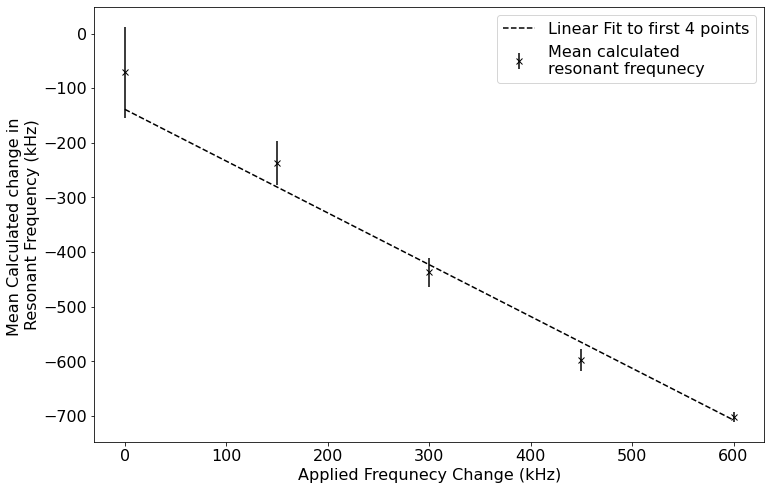

In [10]:
# Set the number of repeats per measurement. 
measurement_repeats = 3 

mean_frequency = []
std_freq_measurement = [] 

single_shot_measurement = []
single_shot_error = []

for i in range(int(len(measured_freq)/measurement_repeats)):
    mean_frequency.append(np.mean(measured_freq[(i*measurement_repeats):(i+1)*measurement_repeats]))
    std_freq_measurement.append(np.std(measured_freq[(i*measurement_repeats):(i+1)*measurement_repeats]))
    
    single_shot_measurement.append(measured_freq[i*measurement_repeats])
    single_shot_error.append(data['error Calculated change in res freq (kHz) '][i*measurement_repeats])
    
print(mean_frequency)

applied_freq_change = [0, 150, 300, 450, 600]
applied_freq_change = np.array(applied_freq_change)
P0 = [0,0]

fig, ax = plot.subplots()

ax.errorbar(applied_freq_change, mean_frequency, std_freq_measurement, marker = 'x', 
             linestyle = '', label = 'Mean calculated \nresonant frequnecy', color = 'k')

coeffs, confidence = opt.curve_fit(linear_equation, applied_freq_change, mean_frequency, P0, 
                                  sigma = std_freq_measurement)
error = np.sqrt(np.diag(confidence))

y = linear_equation(applied_freq_change, coeffs[0], coeffs[1])
ax.plot(applied_freq_change, y, linestyle = '--', 
         label = 'Linear Fit to first 4 points', color = 'k')

#ax.plot(applied_freq_change, y2, linestyle = '-.', 
#         label = 'Linear Fit to all points', color = 'r')

ax.set_xlabel('Applied Frequnecy Change (kHz)')
ax.set_ylabel('Mean Calculated change in \nResonant Frequency (kHz)')

#ax.axis([-0.05, 1.55, np.min(mean_frequency)-0.5, np.max(mean_frequency)+0.5])
ax.legend()

print(coeffs)
print(error)

print('\n')
print(mean_frequency)
print(std_freq_measurement)

In [10]:
#fig.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\' + 
#           date + '\\' + date + '_Fujiwara_mean_res_freq_shif#t' + '.pdf')

C:\Users\Ryan\AppData\Local\conda\conda\envs\Ryan\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


[ -1.00540506 155.29249549]
[ 0.19411766 83.87473493]
-607.9724575462087


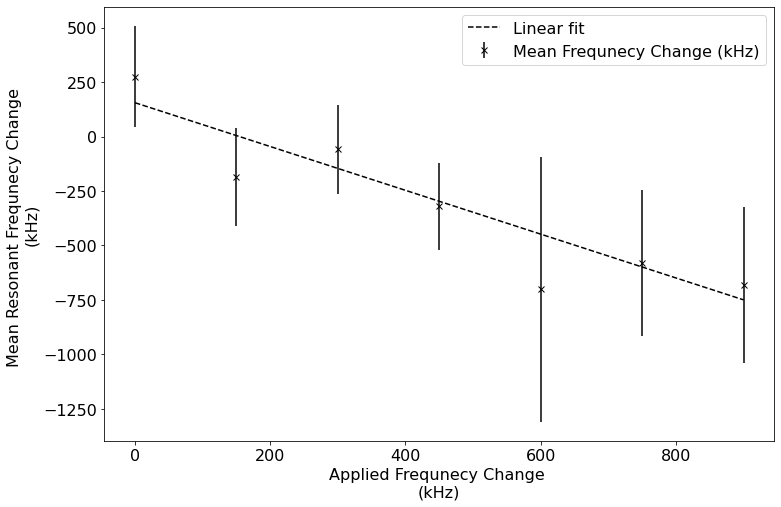

In [11]:
fig2, ax2 = plot.subplots()

ax2.errorbar(applied_freq_change, single_shot_measurement, single_shot_error, marker = 'x', 
              linestyle = '', color = 'k', label = 'Mean Frequnecy Change (kHz)')

coeffs_2, confidence = opt.curve_fit(linear_equation, applied_freq_change, 
                                     single_shot_measurement, P0, sigma = single_shot_error)

error_2 = np.diag(np.sqrt(confidence))

y3 = linear_equation(applied_freq_change, coeffs_2[0], coeffs_2[1])

ax2.plot(applied_freq_change, y3, color = 'k', 
         linestyle = '--', label = 'Linear fit')

ax2.set_xlabel('Applied Frequnecy Change \n(kHz)')
ax2.set_ylabel('Mean Resonant Frequnecy Change \n(kHz)')
plot.legend()

print(coeffs_2)
print(error_2)

print(np.min(single_shot_error))
#fig2.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\' + 
 #          date + '\\' + date + '_Fujiwara_single_res_freq_shift' + '.pdf')

In [10]:
dwell_time = data['Dwell Time (ms) '][0]
repeats = data['Repeats per applied freq'][0]

total_time = dwell_time*repeats*4# *2
print(total_time/1000)

16.0


In [24]:
print(np.min(single_shot_error))

-199.1200411325377


In [36]:
N = 5

200/(N)
40/75

0.5333333333333333

NameError: name 'mean_odmr_data' is not defined

In [38]:
40000*4*10

1600000

In [40]:
np.sqrt(38.8)

6.2289646009589745

In [41]:
1.5/6.23

0.2407704654895666

In [42]:
0.24*np.sqrt(20)

1.0733126291998991

In [18]:
0.95*np.sqrt(2*175)

17.77287258717622

In [16]:
a = 0
for i in range(len(std_freq_measurement)):
    a = a + np.abs(std_freq_measurement[i])
    
a = a/len(std_freq_measurement)
print(a)

72.71551231073829


###### 